# 1. 차원 축소(Dimension Reduction) 개요 

**차원 축소**
- 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트 생성
- 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어져 희소(sparse)한 구조를 갖게 됨
- 수백 개 이상의 피처로 구성된 데이터 세트의 경우, 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐
- 피처가 많을수록 개별 피처 간에 상관관계가 높을 가능성이 큼 ⇒ 다중 공선성 문제로 모델의 예측 성능 저하

⇒ 따라서, 매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이자!

- **피처 선택**
    - 특정 피처에 종속성이 강한 불필요한 피처 제거
    - 데이터의 특징을 잘 나타내는 주요 피처만 선택
- **피처 추출**
    - 기존 피처를 저차원의 중요 피처로 압축해서 추출
    - 기존의 피처가 압축된 것이므로, 기존의 피처와는 완전히 다른 값
    - 기존 피처를 **단순 압축이 아닌**, 피처를 함축적으로 더 잘 설명할 수 있는 또다른 공간으로 매핑해 추출
        - 예시: 학생 평가 요소 - 모의고사 성적, 종합 내신 성적, 수능 성적, 봉사 활동, 대외 활동, 학교 내외 수상 경력
        - 피처 추출 후 - 학업 성취도, 커뮤니케이션 능력, 문제 해결력
    - 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소를 추출
- 대표적인 차원 축소 알고리즘 : PCA, SVD, NMF
    - 이미지 변환/압축
        - 매우 많은 픽셀로 이루어진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환/압축
        - 변환된 이미지는 원본 이미지보다 훨씬 적은 차원 ⇒ 과적합 감소
    - 텍스트 문서의 숨겨진 의미 추출
        - 문서 내 단어들의 구성에서 숨겨져 있는 semantic 의미나 topic을 잠재 요소로 간주하고, 이를 찾아냄
        - SVD, NMF

# 2. PCA(Principal Component Analysis)

## PCA 개요

**PCA**
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 **주성분(Principal Component)** 을 추출해 차원을 축소
- 기존 데이터의 정보 유실을 최소화하기 위해, **가장 높은 분산을 가지는 데이터의 축**을 찾아 이 축으로 차원을 축소 ⇒ PCA의 주성분
- 가장 큰 데이터 변동성(분산)을 기반으로 첫 번째 벡터 축 생성
- 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 함
- 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터(직교 벡터)를 축으로 함
- 생성된 벡터 축에 원본 데이터를 투영 ⇒ 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소

**선형대수 관점**
- 입력 데이터의 공분산 행렬을 고유값 분해
- 고유벡터에 입력 데이터를 선형 변환
    - 고유벡터 : PCA의 주성분
    - 고유값 : 고유벡터의 크기, 입력 데이터의 분산
- 선형 변환
    - 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환
    - 특정 벡터를 하나의 공간에서 다른 공간으로 투영
    - 행렬 A = 새로운 공간
- 분산 : 한 개의 특정한 변수의 데이터 변동
- 공분산 : 두 변수 간의 변동
- 공분산 행렬은 고유벡터 직교 행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬로 분해 가능
    
    ⇒ PCA : 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환

**PCA의 수행 단계**

1. 입력 데이터 세트의 공분산 행렬 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)의 고유벡터 추출
4. 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

### 붓꽃 데이터 세트 PCA 변환

- 붓꽃 데이터 세트는 4개의 피처로 구성
- 4개의 피처를 2개의 PCA 차원으로 압축

**붓꽃 데이터 로딩**

In [97]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**데이터 분포 시각화**

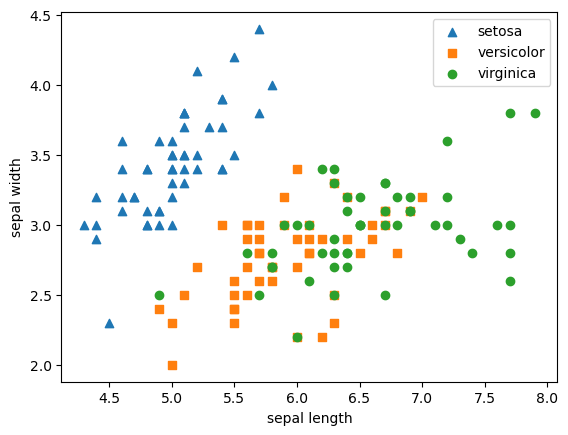

In [98]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- setosa : sepal width와 sepal length에 따라 일정하게 분포되어 있어 쉽게 분류 가능
- versicolor, virginica : sepal width와 sepal length 조건만으로 분류 불가능

**각 속성 값을 동일한 스케일로 변환**

In [99]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

**PCA를 적용해 데이터 세트를 4차원 -> 2차원으로 변환**

- 사이킷런의 PCA 클래스
    - n_components 파라미터 : PCA로 변환할 차원의 수
    - fit, transform 메서드 호출

In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


**변환된 PCA 데이터 세트(numpy)를 DataFrame으로 변환**

In [101]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


**변환된 PCA 데이터 세트 시각화**

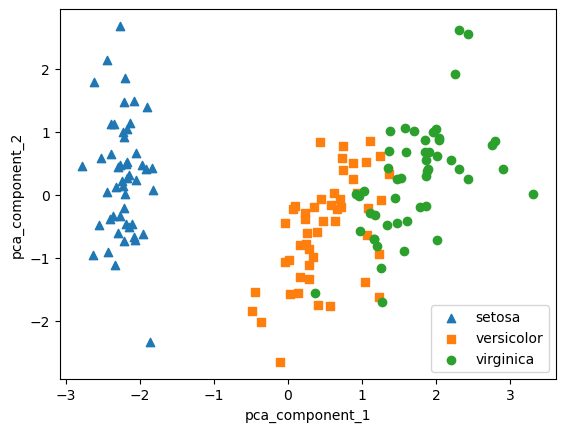

In [102]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- setosa : 명확하게 구분 가능
- versicolor, virginica : pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재하나, 비교적 잘 구분됨

**explained_variance_ratio_**

전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율

In [103]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- pca_component_1 : 전체 변동성의 약 72.9% 차지
- pca_component_2 : 전체 변동성의 약 22.8% 차지

⇒ PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명 가능

**원본 데이터 세트와 PCA 변환된 데이터 세트의 분류 성능 비교**

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [105]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- 예측 정확도 8% 하락
- 4차원을 2차원으로 축소 ⇒ 피처 개수가 50% 감소

⇒ 피처 감소 비율 대비 예측 정확도 하락은 미미

⇒ PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지

### credit card 데이터 세트 PCA 변환

In [106]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


- 타겟값 : default payment next month(다음달 연체 여부)
    - 연체일 경우 1, 정상납부일 경우 0
- PAY_0 다음이 PAY_2이므로 PAY_0을 PAY_1로 칼럼명 변경
- 타겟값 칼럼의 이름이 너무 길기 때문에 default로 칼럼명 변경

**피처 전처리**

In [107]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [108]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

**각 피처 간의 상관도를 구하고 시각화**

<Axes: >

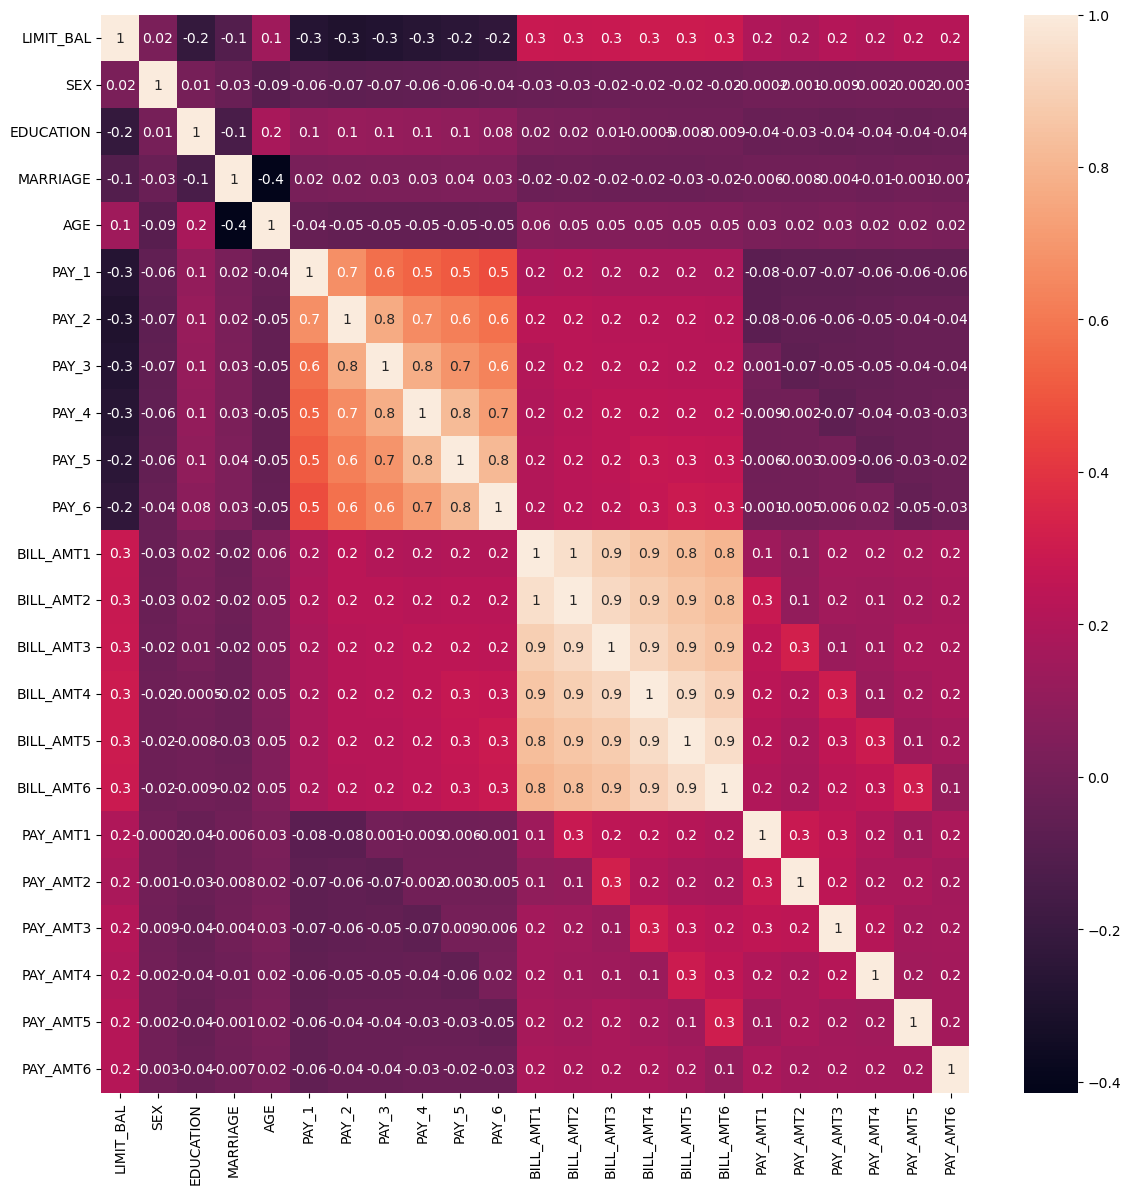

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')


BILL_AMT1 ~ BILL_AMT6, PAY_1 ~ PAY_6 상관도가 매우 높은 것을 확인

⇒ 높은 상관도를 가진 속성들은 소수의 PCA만으로도 변동성 수용 가능

**BILL_AMT1~BILL_AMT6 을 2개의 컴포넌트로 PCA**

In [110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
# 첫 번째 PCA 축으로 90% 변동성 수용할 정도로 6개 속성의 상관도가 매우 높음
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


- 2개의 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명 가능
- 특히, 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 6개 속성 간의 상관도가 매우 높음

**원본 데이터 세트와 6개의 컴포넌트로 PCA 변환된 데이터 세트의 분류 성능 비교**

In [111]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [112]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7913 0.7963 0.8027]
PCA 변환 데이터 셋 평균 정확도:0.7968


- 예측 정확도 1~2% 하락
- 23차원을 6차원으로 축소 ⇒ 피처 개수가 75% 감소

⇒ PCA 변환 후에도 예측 성능 유지

⇒ PCA의 뛰어난 압축 능력

# 3. LDA(Linear Discriminant Analysis)

### LDA 개요

**LDA**
- 선형 판별 분석법
- 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소 ⇒ PCA와 매우 유사
- 단, **지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지**하면서 차원을 축소
- 입력 데이터의 **결정 값 클래스를 최대한으로 분리할 수 있는 축**을 찾음
- 클래스 간 분산은 최대한 크게, 클래스 내부 분산은 최대한 작게 하는 방식으로 차원 축소
- 공분산 행렬이 아닌, 클래스 간 분산과 클래스 내부 분산 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영

**LDA의 수행 단계**

1. 클래스 내부와 클래스 간 분산 행렬 구하기
2. 두 행렬을 고유벡터로 분해
3. 고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출
4. 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

### 붓꽃 데이터 세트 LDA 변환

- 사이킷런의 LinearDiscriminantAnalysis 클래스

**붓꽃 데이터 세트 로딩 및 스케일링**

In [126]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

**붓꽃 데이터를 2개의 컴포넌트로 LDA 변환**

LDA는 PCA와 다르게 지도학습에 해당하므로, 클래스의 결정 값이 변환 시에 필요함에 유의

⇒ Ida 객체의 fit() 메서드 호출 시 결정값 입력

In [127]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


**변환된 LDA 데이터 세트 시각화**

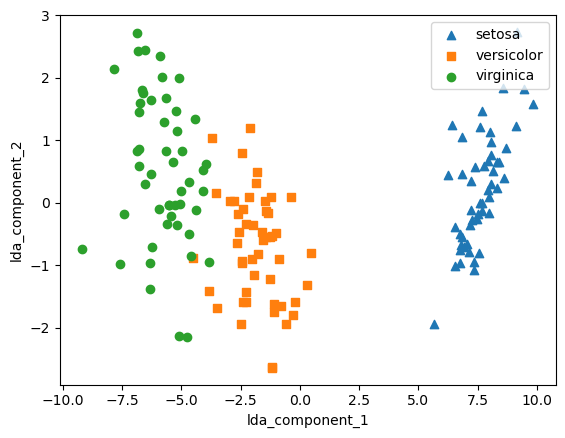

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

# 4. SVD(Singular Value Decomposition

### SVD 개요

**SVD**
- 특이값 분해
- 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용 가능
- $A = U\Sigma V^T$
    - 행렬 U와 V에 속한 벡터 : 특이벡터(singular vector)
    - 모든 특이벡터는 서로 직교
    - $\Sigma$ : 대각행렬(diagonal matrix)
        - 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0
        - $\Sigma$ 이 위치한 0이 아닌 값이 바로 행렬 A의 특이값
- 보통 넘파이나 사이파이를 이용해 수행

**랜덤한 넘파이 행렬 생성**

행렬의 개별 로우끼리의 의존성을 없애기 위함

In [116]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


**생성된 a 행렬에 SVD를 적용해 U, $\Sigma$, $V^T$ 도출**

$\Sigma$ 행렬의 경우, 0이 아닌 값만 1차원 행렬로 표현

In [117]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


**U, $\Sigma$, $V^T$를 내적하여 원본 행렬로 복원**

$\Sigma$ 행렬의 경우, 0이 아닌 값만 1차원 행렬로 추출하였으므로 다시 0을 포함한 대칭행렬로 변환 필요

In [118]:
# Sigma를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


**데이터 세트의 로우 간 의존성을 부여**

In [119]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


**SVD를 적용해 U, $\Sigma$, $V^T$ 도출**

In [120]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


$\Sigma$ 값 중 2개가 0으로 변함 ⇒ 선형 독립인 로우 벡터의 개수가 2개라는 의미

**원본 행렬로 복원**

$\Sigma$ 의 0에 대응되는 U, $\Sigma$, $V^T$ 의 데이터는 제외하고 복원

In [121]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


**Truncated SVD를 이용한 행렬 분해 및 원본 행렬 복원**

- **Truncated SVD**
    - $\Sigma$ 행렬에 있는 대각원소 중 상위 일부 데이터만 추출해 분해
    - 원본 행렬을 정확하게 복원 불가하지만, 상당한 수준으로 원본 행렬에 근사 가능
    - 사이파이에서만 지원
    - 희소 행렬로만 지원 ⇒ scipy.sparse.linalg.svds 이용

In [122]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

### 사이킷런 TruncatedSVD 클래스를 이용한 변환

- 사이킷런의 TruncatedSVD 클래스
    - fit()과 transform() 메서드를 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원 축소해 변환
    - 원본 데이터를 Truncated SVD 방식으로 분해된 U*$\Sigma$ 행렬에 선형 변환

**붓꽃 데이터 세트 TruncatedSVD 변환**

Text(0, 0.5, 'TruncatedSVD Component 2')

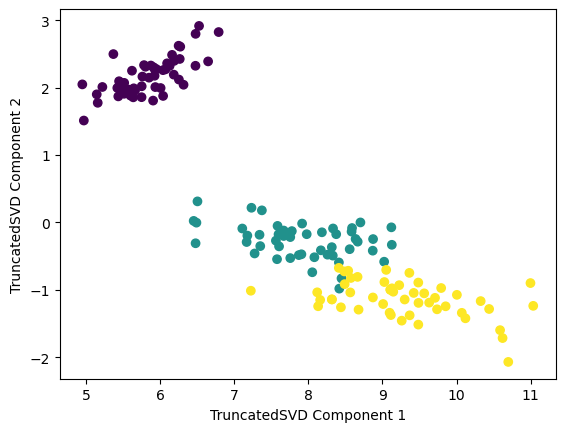

In [123]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

- TruncatedSVD 변환 역시 PCA와 유사하게 변환 후 품종별로 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가짐
- 사이킷런의 TruncatedSVD와 PCA 클래스는 모두 SVD를 이용해 행렬을 분해

**붓꽃 데이터 세트 TruncatedSVD, PCA 클래스 변환 비교**

Text(0.5, 1.0, 'PCA Transformed')

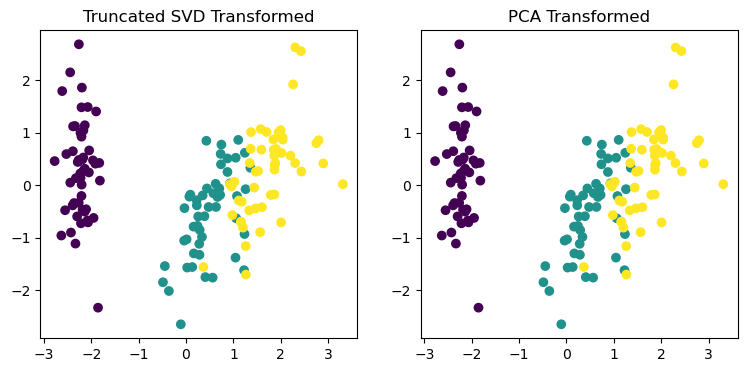

In [124]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

변환 행렬 값과 원복 속성별 컴포넌트 비율 값이 거의 동일

In [125]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3319772039324485e-15
5.421010862427522e-17


# 5. NMF(Non-Negative Matrix Factorization)

### NMF 개요

**NMF**
- 낮은 랭크를 통한 행렬 근사 방식의 변형
- 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는 게 보장되면 더 간단하게 두 개의 기반 양수 행렬로 분해
- 행렬 V를 길고 가는 W 행렬과 작고 넓은 H 행렬로 분해
    - 분해된 행렬은 잠재 요소를 특성으로 가짐
    - W 행렬은 원본 행에 대해서 잠재 요소 값이 얼마나 되는지에 대응
    - H 행렬은 잠재 요소가 원본 열로 어떻게 구성되었는지를 나타냄
- 사이킷런의 NMF 클래스

**붓꽃 데이터 세트를 2개의 컴포넌트로 NMF 변환 및 시각화**

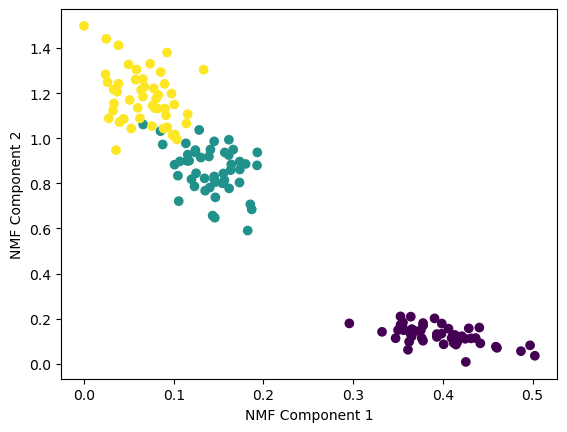

In [76]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

plt.show()
